In [152]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [90]:
header_list = ["tweetid","userid","user_display_name","user_screen_name","user_reported_location","user_profile_description","user_profile_url","follower_count","following_count","account_creation_date","account_language","tweet_language","tweet_text","tweet_time","tweet_client_name","in_reply_to_tweetid","in_reply_to_userid","quoted_tweet_tweetid","is_retweet","retweet_userid","retweet_tweetid","latitude","longitude","quote_count","reply_count","like_count","retweet_count","hashtags","urls","user_mentions","poll_choices"]
header_dict = {val:i for i,val in enumerate(header_list)}

In [194]:
import sys

def parse(f,chunksize = 100000, cols = None, test_bool = False, dtype = None):
    lines = 9041*1000
    for i,gm_chunk in enumerate(pd.read_csv("ira_tweets_csv_hashed.csv",chunksize = chunksize, usecols = cols, dtype = dtype)):
        f(gm_chunk)
        if test_bool:
            print('Done')
            break
        j = i*chunksize/lines
        sys.stdout.write('\r')
        # the exact output you're looking for:
        bar_int = int(j*20)
        sys.stdout.write("[%-20s] %d%%" % ('='*bar_int, int(j*100 + 1)))
        sys.stdout.flush()


In [92]:
global userids
userids = set()
def f(gm_chunk):
    global userids
    userids = userids.union(set(gm_chunk[1]))
    
parse(f, 100, test_bool = True)

Done


In [93]:
global df_test
def f(chunk):
    global df_test
    df_test = chunk

parse(f, 2, test_bool = True)

Done


In [175]:
print(df_test[:1].to_string())

        0       1                  2                 3                       4                         5                 6               7                8                      9                 10              11          12          13                 14                   15                  16                    17          18              19               20        21         22           23           24          25             26        27    28             29            30
0  tweetid  userid  user_display_name  user_screen_name  user_reported_location  user_profile_description  user_profile_url  follower_count  following_count  account_creation_date  account_language  tweet_language  tweet_text  tweet_time  tweet_client_name  in_reply_to_tweetid  in_reply_to_userid  quoted_tweet_tweetid  is_retweet  retweet_userid  retweet_tweetid  latitude  longitude  quote_count  reply_count  like_count  retweet_count  hashtags  urls  user_mentions  poll_choices


In [121]:
cols = header_dict['hashtags']
global hashtag_set
hashtag_set = set()
def f(chunk):
    global hashtag_set
    hashtag_set = hashtag_set.union(set(str(h) for h in chunk[cols]))

parse(f, 10000,cols = None, test_bool = True)    

Done


In [149]:
cols = [header_dict['follower_count'], header_dict['userid']]
global follower_dict
follower_dict = defaultdict()
def f(chunk):
    global follower_list
    for count,userid in zip(chunk['follower_count'], chunk['userid']):
        follower_dict[userid] =  count

parse(f, 10000,cols = cols, test_bool = False)    

[=================== ] 100%

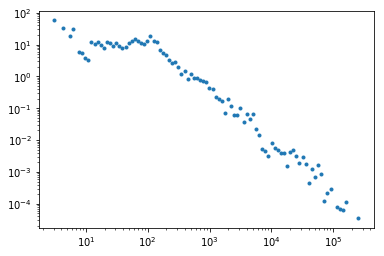

In [163]:
foll_count = np.array(list(follower_dict.values()))

bins = np.exp( np.linspace(1,np.log(max(foll_count)), 100) )
follower_hist, bins = np.histogram(foll_count, bins = bins)

follower_hist = follower_hist/(bins[1:] - bins[:-1])

plt.loglog(bins[1:], follower_hist, marker = '.', linestyle = ' ')

(25000, 270519.7640859086)

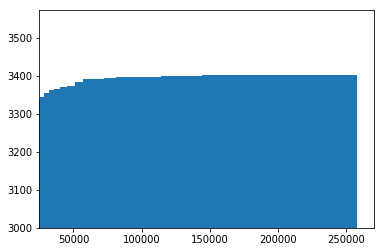

In [319]:
_ = plt.hist(foll_count, bins = bins, cumulative= True)
plt.ylim(3000,)
plt.xlim(25000,)

In [320]:
sum([c > 3000 for c in foll_count])

277

In [222]:
cols = ['retweet_tweetid', 'tweetid']
global t_rt_dict
t_rt_dict = defaultdict()
def f(chunk):
    for rt_id, t_id in zip(chunk['tweetid'], chunk['retweet_tweetid']):
        if t_id == t_id and rt_id == rt_id:
            t_rt_dict[int(t_id)] = int(rt_id)
        

parse(f, 100000, cols = cols, test_bool = False)    

[=================== ] 100%

In [227]:
from collections import Counter
rt_count = Counter(t_rt_dict.values())

In [238]:
list(t_rt_dict.items())[:100]

[(877917212119416832, 877920066204876801),
 (577485402124111872, 577490527299457024),
 (596514222684524544, 596522768109346816),
 (665522169724739584, 665533110633799680),
 (570982880706490368, 571061673160790016),
 (499126024211533824, 499129492028547073),
 (559043828242731008, 559048006557659136),
 (560404771367292928, 560410339725307904),
 (595333029335343104, 595345056548130816),
 (631210828142931968, 631396089921433600),
 (567611373467623424, 567617561022697472),
 (586420809486307328, 586431241265614849),
 (668883202090639360, 668895953546559488),
 (594304015795617792, 594313359421497344),
 (584370963304882176, 584376239877652480),
 (668780474249175040, 668789501179904000),
 (563647663804268544, 563649907534614529),
 (665305644447244288, 665316892026867712),
 (677247097717043200, 677260332323241985),
 (644515988889800704, 644524087847559168),
 (592421691717988352, 592430800022413313),
 (628967569668579328, 628976636818522113),
 (514646923316580352, 514698268086124545),
 (594256475

In [269]:
cols = ['retweet_tweetid']
global rt_ids_list
global rt_ids_set
global rt_ids_count
rt_ids_count = defaultdict(int)
rt_ids_list = []
rt_ids_set = set()

def f(chunk):
    #rt_ids_set = rt_ids_set.union(chunk['retweet_tweetid'])
    for rt_id in chunk['retweet_tweetid']:
        if rt_id == rt_id:
            rt_id = int(rt_id)
            rt_ids_set.add(rt_id)
            rt_ids_list.append(rt_id)
            rt_ids_count[rt_id] += 1

parse(f, 100000, cols = cols, test_bool = False)  

[=================== ] 100%

In [266]:
len(rt_ids_list) - len(rt_ids_set)

1607343

In [267]:
len(rt_ids_set), len(rt_ids_list)

(1725841, 3333184)

In [279]:
# the values are the number of tweets that were retweeted key times
# keys is how often the retweet was retweeted

rt_count = Counter(rt_ids_count.values())

(array([1.366476e+06, 2.423370e+05, 7.909500e+04, 1.879800e+04,
        8.470000e+03, 3.046000e+03, 2.016000e+03, 1.349000e+03,
        1.416000e+03]),
 array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
        11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ]),
 <a list of 9 Patch objects>)

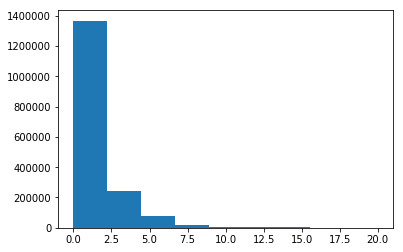

In [287]:
c_bins = np.linspace(0, 20, 10)
plt.hist(rt_ids_count.values(), bins = c_bins)

In [296]:
sum( True for retw_count in rt_ids_count.values() if retw_count > 600)

2

In [322]:
import networkx as nx

In [ ]:
global G
G = nx.Graph()
hashtag_set = set()
def f(chunk):
    for uid, fc in zip(chunk['userid'], chunk['follower_count']):
        if fc > 500:
            G.add_node(uid)
            
parse(f, 40000,cols = ['userid', 'follower_count'], test_bool = False)    

[=                   ] 8%

In [ ]:
global nset
nset = set(G.nodes())

In [ ]:
len(G.nodes())

In [ ]:
cols = ["in_reply_to_userid", "userid"]

global id_rep_id
id_rep_id = defaultdict(int)

def f(chunk):
    #rt_ids_set = rt_ids_set.union(chunk['retweet_tweetid'])
    for uid, rid in zip(chunk['userid'], chunk['in_reply_to_userid']):
        if rid in nset and uid in nset:
            id_rep_id[(uid, rid)] += 1
            

parse(f, 100000, cols = cols, test_bool = False)   

In [ ]:
len(id_rep_id)

In [ ]:
for e,w in id_rep_id.items():
    G.add_edge(e[0], e[1], weight = w)

In [ ]:
sG = nx.subgraph(G, [n for n,d in G.degree() if d > 0])

In [ ]:
nx.draw(sG, pos =  nx.spring_layout(sG), node_size = 3)